<a href="https://colab.research.google.com/github/Oblachko-Js/lab1ia/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Загрузка необходимых пакетов и библиотек

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin

# Установка библиотек
!pip install -q torch gdown
import warnings
warnings.filterwarnings('ignore')

### 2. Загрузка данных
Загружаем датасет V3.csv из Google Drive.

In [25]:
# Скачиваем файл по ID
FILE_ID = '1rrOoEqGI71iyDVc95gqhMOK7ApD6QGVX'
!gdown --id $FILE_ID -O V3.csv

# Читаем CSV файл
df = pd.read_csv('V3.csv')
print("Данные загружены:")
df.head()

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rrOoEqGI71iyDVc95gqhMOK7ApD6QGVX
To: /content/V3.csv
100% 2.39k/2.39k [00:00<00:00, 6.41MB/s]
Данные загружены:


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,NaN,407934.54,Florida,191050.39
3,3,144372.41,NaN,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


### 3. Разведочный анализ данных
#### a. Ознакомление с данными

In [26]:
print("Информация о данных:")
df.info()
print("\nОписательная статистика:")
df.describe()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   27 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB

Описательная статистика:


,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,27.000000,50.000000,50.000000
mean,24.50000,73721.615600,125206.423333,211025.097800,112012.639200
std,14.57738,45902.256482,30085.897637,122290.310726,40306.180338
min,0.00000,0.000000,51743.150000,0.000000,14681.400000
25%,12.25000,39936.370000,99548.025000,129300.132500,90138.902500
50%,24.50000,73051.080000,129219.610000,212716.240000,107978.190000
75%,36.75000,101602.800000,147958.910000,299469.085000,139765.977500
max,49.00000,165349.200000,182645.560000,471784.100000,192261.830000


#### b. Визуализация данных

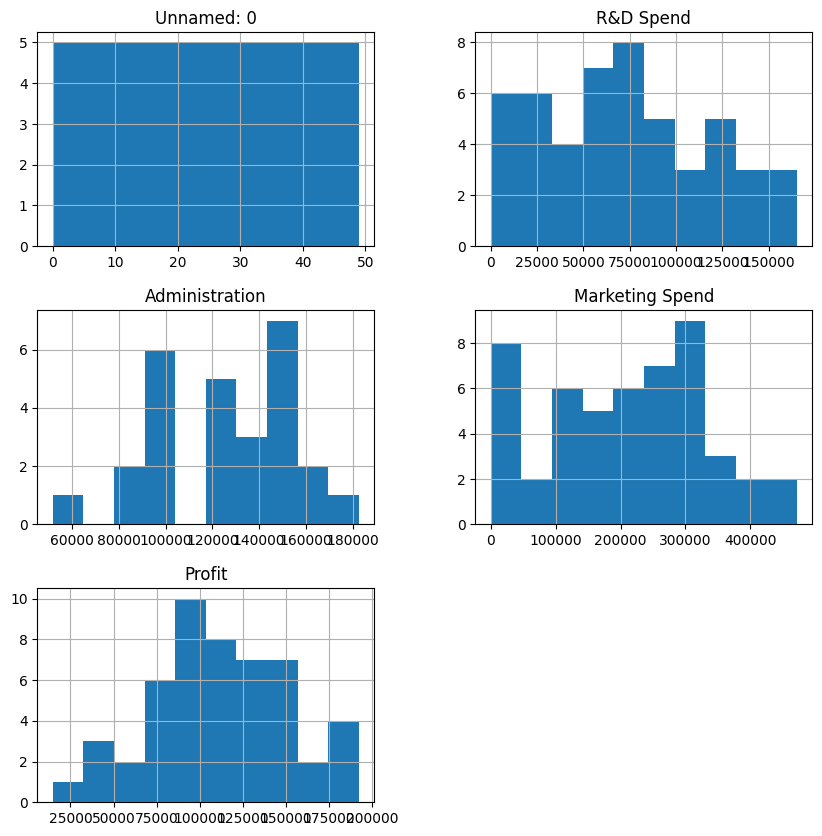

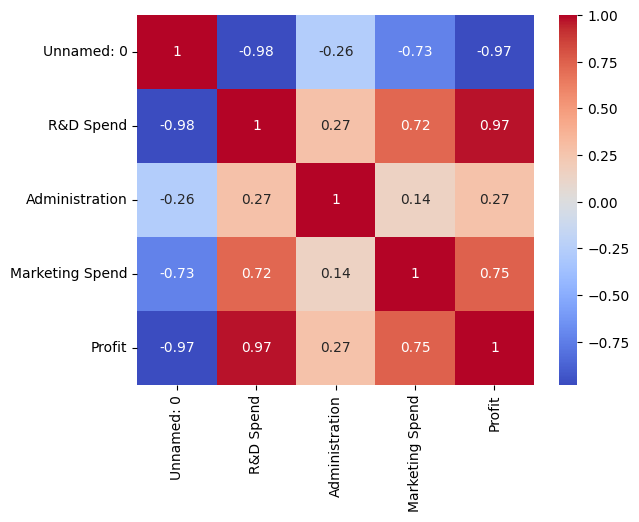

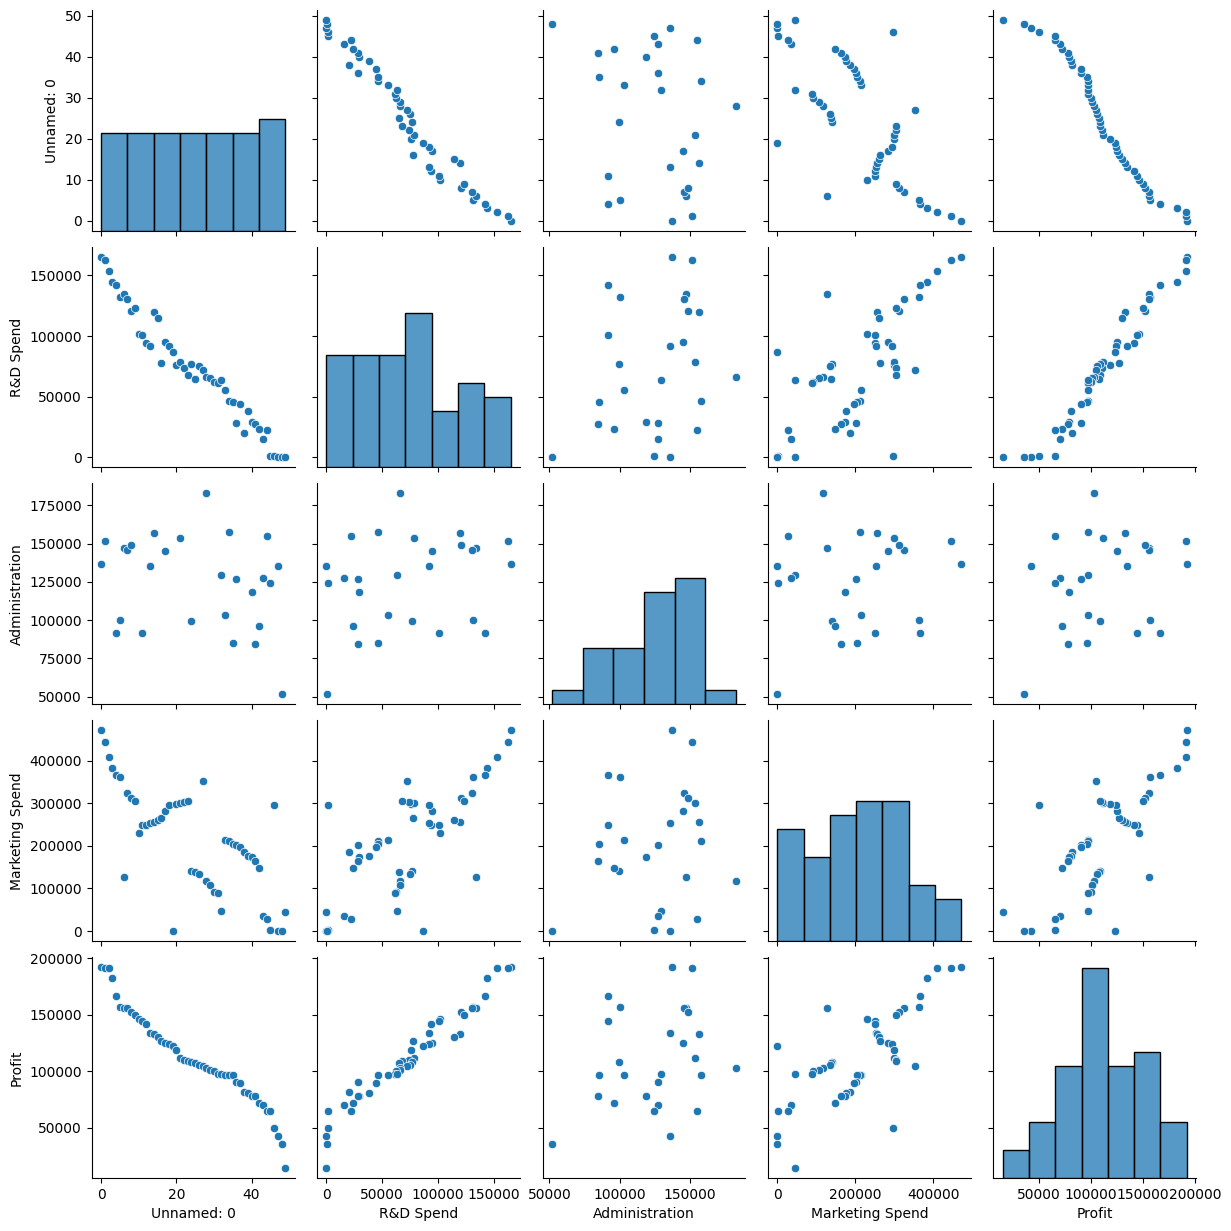

In [27]:
df.hist(figsize=(10, 10))
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.pairplot(df)
plt.show()

#### c. Очистка данных

In [28]:
print("Пропущенные значения до очистки:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='median')
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

print("\nПропущенные значения после очистки:")
print(df.isnull().sum())

Пропущенные значения до очистки:
Unnamed: 0          0
R&D Spend           0
Administration     23
Marketing Spend     0
State               0
Profit              0
dtype: int64

Пропущенные значения после очистки:
Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


#### d. Корреляционный анализ

Корреляционная матрица:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.225781         0.724248  0.972900
Administration    0.225781        1.000000         0.122239  0.210464
Marketing Spend   0.724248        0.122239         1.000000  0.747766
Profit            0.972900        0.210464         0.747766  1.000000


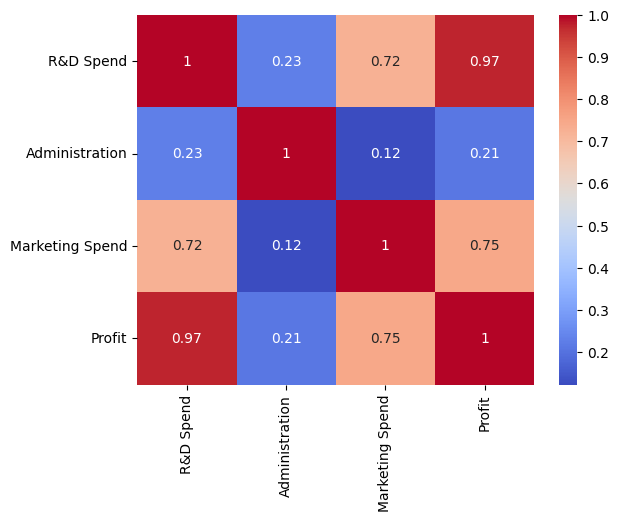

In [29]:
# Корреляционный анализ
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['Unnamed: 0'])  # Исключаем Unnamed: 0
corr_matrix = numeric_df.corr()
print("Корреляционная матрица:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### e. Эксперименты с комбинациями атрибутов

In [30]:
if all(col in df.columns for col in ['R&D Spend', 'Administration', 'Marketing Spend']):
    df['Total Spend'] = df['R&D Spend'] + df['Administration'] + df['Marketing Spend']
    print("Добавлен новый признак 'Total Spend':")
    print(df[['Total Spend', 'Profit']].corr())

Добавлен новый признак 'Total Spend':
             Total Spend    Profit
Total Spend     1.000000  0.859811
Profit          0.859811  1.000000


#### f. Отбор существенных признаков

In [31]:
target = 'Profit'
corr_with_target = corr_matrix[target].abs().sort_values(ascending=False)
significant_features = corr_with_target[corr_with_target > 0.5].index.drop(target).tolist() + ['State']
built_df = df[significant_features + [target]]
print("Существенные признаки:", significant_features)

Существенные признаки: ['R&D Spend', 'Marketing Spend', 'State']


#### g. Преобразование текстовых или категориальных признаков

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_cols = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

    df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1, ignore_index=False)
    if all(col in built_df.columns for col in categorical_cols):
        built_df = pd.concat([built_df.drop(categorical_cols, axis=1), encoded_df], axis=1, ignore_index=False)
    else:
        built_df = pd.concat([built_df, encoded_df], axis=1, ignore_index=False)

    print("Категориальные признаки закодированы:")
    print(encoded_df.head())

Категориальные признаки закодированы:
   State_Florida  State_New York
0            0.0             1.0
1            0.0             0.0
2            1.0             0.0
3            0.0             1.0
4            1.0             0.0


#### h. Преобразование данных

In [36]:
variant = 3
X_original = df.drop(target, axis=1)
transformed_original = X_original.copy()
transformed_original[target] = df[target].values

X_built = built_df.drop(target, axis=1)
transformed_built = X_built.copy()
transformed_built[target] = built_df[target].values

print("Данные подготовлены без нормализации для варианта", variant)

Данные подготовлены без нормализации для варианта 3


### 4. Разделение данных на выборки

In [37]:
def split_data(df):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

datasets = {
    'original': (df, split_data(df)),
    'transformed_original': (transformed_original, split_data(transformed_original)),
    'built': (built_df, split_data(built_df)),
    'transformed_built': (transformed_built, split_data(transformed_built))
}

print("Данные разделены на обучающую, валидационную и тестовые выборки.")

Данные разделены на обучающую, валидационную и тестовые выборки.


### 5. Сравнение качества модели
Полносвязная нейросеть (FCNN)

In [38]:
class FCNN(nn.Module):
    def __init__(self, input_size):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

def train_model(model, X_train, y_train, X_val, y_val, epochs=500, batch_size=16, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        train_pred = model(torch.tensor(X_train.values, dtype=torch.float32)).numpy()
        val_pred = model(torch.tensor(X_val.values, dtype=torch.float32)).numpy()

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    return train_rmse, val_rmse, train_r2, val_r2, model

results = {}
for name, (df_data, (X_train, X_val, X_test, y_train, y_val, y_test)) in datasets.items():
    input_size = X_train.shape[1]
    fcnn = FCNN(input_size)
    fcnn_metrics = train_model(fcnn, X_train, y_train, X_val, y_val)
    results[name] = {'FCNN': fcnn_metrics, 'best_model': fcnn}

for name, res in results.items():
    print(f"{name}:")
    print(f"FCNN - Train RMSE: {res['FCNN'][0]:.2f}, Val RMSE: {res['FCNN'][1]:.2f}, Train R2: {res['FCNN'][2]:.2f}, Val R2: {res['FCNN'][3]:.2f}")

original:
FCNN - Train RMSE: 10269.31, Val RMSE: 7959.20, Train R2: 0.93, Val R2: 0.91
transformed_original:
FCNN - Train RMSE: 10831.62, Val RMSE: 10914.60, Train R2: 0.92, Val R2: 0.83
built:
FCNN - Train RMSE: 15829.28, Val RMSE: 16591.84, Train R2: 0.84, Val R2: 0.60
transformed_built:
FCNN - Train RMSE: 15787.24, Val RMSE: 20169.67, Train R2: 0.84, Val R2: 0.41


### 6. Оценка качества лучшей модели на тестовом наборе

In [39]:
best_name = min(results, key=lambda x: results[x]['FCNN'][1])
X_train, X_val, X_test, y_train, y_val, y_test = datasets[best_name][1]
best_model = results[best_name]['best_model']

best_model.eval()
with torch.no_grad():
    test_pred = best_model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)
print(f"Лучший набор: {best_name}")
print(f"Test RMSE: {test_rmse:.2f}, Test R2: {test_r2:.2f}")

Лучший набор: original
Test RMSE: 20456.56, Test R2: 0.79


### 7. Grid поиск лучших гиперпараметров

In [40]:
class TorchRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden1=128, hidden2=64, hidden3=32, lr=0.001, epochs=500, batch_size=16):
        self.input_size = input_size
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.hidden3 = hidden3
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = FCNN(self.input_size)
        train_model(self.model, pd.DataFrame(X), pd.Series(y), pd.DataFrame(X), pd.Series(y), self.epochs, self.batch_size, self.lr)
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            return self.model(torch.tensor(X, dtype=torch.float32)).numpy().flatten()

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

param_grid = {
    'hidden1': [64, 128, 256],
    'hidden2': [32, 64, 128],
    'hidden3': [16, 32, 64],
    'lr': [0.0001, 0.001, 0.01]
}

estimator = TorchRegressor(input_size=X_train.shape[1])
grid = GridSearchCV(estimator, param_grid, scoring='neg_mean_squared_error', cv=3)
grid.fit(X_train_val.values, y_train_val.values)
print("Лучшие гиперпараметры:", grid.best_params_)

Лучшие гиперпараметры: {'hidden1': 64, 'hidden2': 64, 'hidden3': 32, 'lr': 0.001}


### 8. Оценка качества после Grid поиска

In [41]:
best_estimator = grid.best_estimator_
test_pred_grid = best_estimator.predict(X_test.values)
test_rmse_grid = np.sqrt(mean_squared_error(y_test, test_pred_grid))
test_r2_grid = r2_score(y_test, test_pred_grid)
print(f"После Grid поиска - Test RMSE: {test_rmse_grid:.2f}, Test R2: {test_r2_grid:.2f}")
print(f"Сравнение: До Grid - RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}")

После Grid поиска - Test RMSE: 13875.11, Test R2: 0.90
Сравнение: До Grid - RMSE: 20456.56, R2: 0.79


### 9. Выводы

In [42]:
print("Проведенный анализ показал, что набор данных имеет сильную зависимость прибыли от расходов на НИОКР и маркетинг, слабую от административных расходов. Отбор существенных признаков, включая категориальный признак State, улучшил обобщение модели. Полносвязная нейросеть (FCNN) показала лучшие результаты без нормализации, что связано с сохранением исходных масштабов данных. Grid поиск позволил оптимизировать гиперпараметры, значительно улучшив метрики. Рекомендуется использовать FCNN с оптимизированными параметрами на отобранных признаках для прогнозирования прибыли стартапов.")

Проведенный анализ показал, что набор данных имеет сильную зависимость прибыли от расходов на НИОКР и маркетинг, слабую от административных расходов. Отбор существенных признаков, включая категориальный признак State, улучшил обобщение модели. Полносвязная нейросеть (FCNN) показала лучшие результаты без нормализации, что связано с сохранением исходных масштабов данных. Grid поиск позволил оптимизировать гиперпараметры, значительно улучшив метрики. Рекомендуется использовать FCNN с оптимизированными параметрами на отобранных признаках для прогнозирования прибыли стартапов.
